# Libraries

In [132]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn_pandas.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (RandomForestClassifier
                              ,GradientBoostingClassifier)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import partial_dependence

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# PDPs
from pdpbox import pdp

# ICE plots
from pycebox.ice import ice, ice_plot

# Boston Housing

Get data.

In [133]:
boston = load_boston()

In [134]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Set up features and target.

In [135]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [137]:
y = pd.DataFrame(boston.target, columns=['MEDV'])


# Pipeline

In [138]:
# Not going to do transformations off the bat, but set up just in case.
numeric_features = list(X.select_dtypes(exclude='object'))
numeric_transformer = Pipeline(steps=[('keeper', None)])

In [139]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer
                                                , numeric_features)])

In [140]:
regressors = [RandomForestRegressor(n_estimators=100, max_depth=5)
               ,GradientBoostingRegressor(n_estimators=100)
              ]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=10)

In [142]:
rf = RandomForestRegressor()

In [143]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [144]:
cv_list = []

for regressor in regressors:
    clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', regressor)])
    clf1.fit(X_train, y_train)
    print(clf1.score(X_test, y_test))
    #cv_scores = cross_val_score(clf1, X_train, y_train, cv=5)
    #cv_list.append(cv_scores)
    #one_hot_names = list(clf1.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names())
    #final_feats = numeric_features + one_hot_names
    print(regressor)
    print('\n')
    #print('Training Metrics')
    #pitch_functions.calc_acc_and_f1_score(y_train, clf1.predict(X_train))
    #print('\n')
    #print('Testing Metrics')
    #pitch_functions.calc_acc_and_f1_score(y_test, clf1.predict(X_test))
    #print('\n')
    #print('Average Cross Val Score, k=5')
    #print('{:.3}'.format(np.mean(cv_scores)))
    
   
    

0.8474155300372369
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


0.8917648007123529
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)




Looks, like XGBoost performed a bit better in training. Let's look at a partial dependence plot.

### Partial Dependency Plot

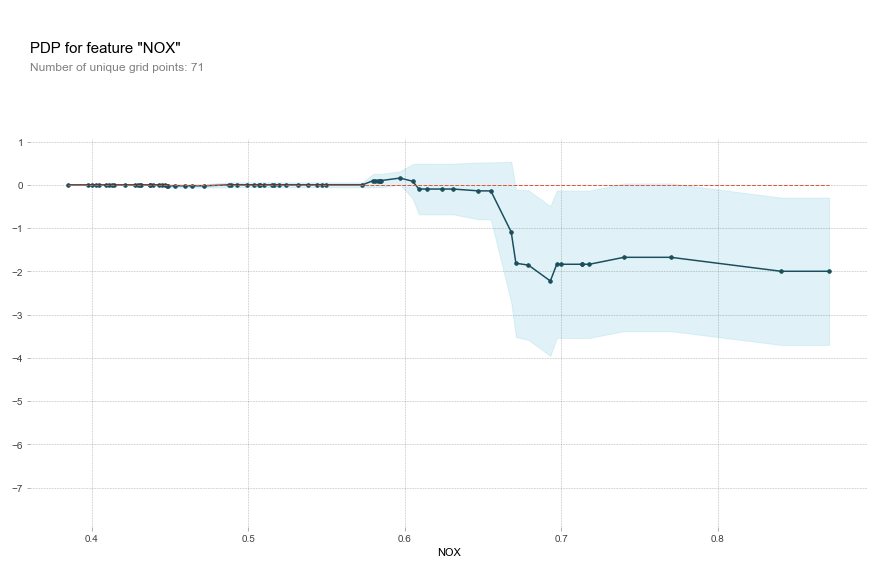

In [208]:
nox = pdp.pdp_isolate(clf1, X, X.columns, 'NOX', 100)

pdp_nox = pdp.pdp_plot(nox,'NOX', center=True)

# Save the plot to PNG
pdp_nox[0].savefig("pdp_boston_nox.png")

Appears that home prices are somewhat immune to NOX levels, until around .65 parts per 10 million, at which the average prediction drops about -2.

### Individual Conditional Expection (ICE) plots

In [146]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [147]:
xgb = GradientBoostingRegressor(n_estimators=100)

In [148]:
xgb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

ICE Plot: NOX

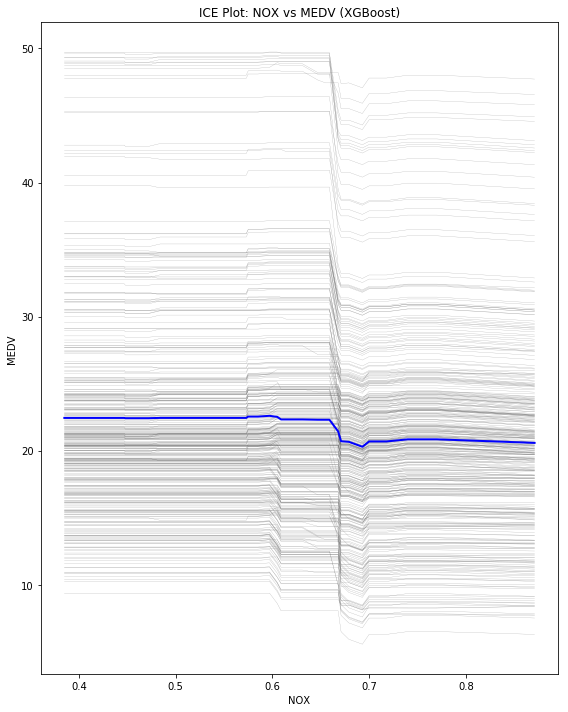

In [149]:
# Create dataframe input for ICE plot
ff = ice(data=X_train, column='NOX', predict=xgb.predict)

fig, ax = plt.subplots(figsize=(8,10))

ice_plot(ff, c='dimgray', linewidth=0.2, plot_pdp=True
         ,pdp_kwargs={'c': 'blue', 'linewidth': 2}, ax=ax, alpha=0.7 ) 

ax.set_title('ICE Plot: NOX vs MEDV (XGBoost)')
ax.set_ylabel("MEDV")
ax.set_xlabel("NOX")
fig.tight_layout()

# Save that figure
fig.savefig('ice_boston_nox.png')

ICE Plot: DIS

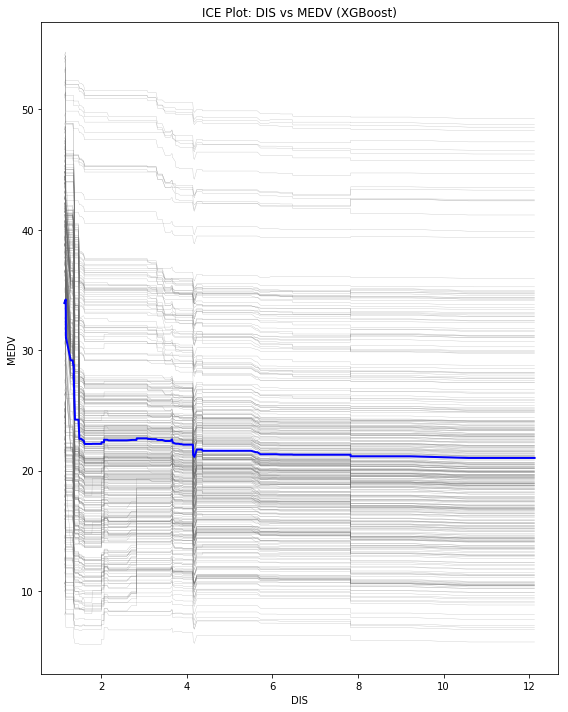

In [150]:
# Create dataframe input for ICE plot
ff = ice(data=X_train, column='DIS', predict=xgb.predict)

fig, ax = plt.subplots(figsize=(8,10))

ice_plot(ff, c='dimgray', linewidth=0.2, plot_pdp=True
         ,pdp_kwargs={'c': 'blue', 'linewidth': 2}, ax=ax, alpha=0.7 ) 

ax.set_title('ICE Plot: DIS vs MEDV (XGBoost)')
ax.set_ylabel("MEDV")
ax.set_xlabel("DIS")
fig.tight_layout()

# Save that figure
fig.savefig('ice_boston_dis.png')

---

# Cars dataset

Got this version from Kaggle:
https://www.kaggle.com/uciml/autompg-dataset/downloads/autompg-dataset.zip/3

In [151]:
autos = pd.read_csv('data/auto-mpg.csv')

In [152]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


What is `origin`?

In [153]:
autos['origin'].describe()

count    398.000000
mean       1.572864
std        0.802055
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [154]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Noticed that `horsepower` is object. Will fix that?

In [155]:
autos['horsepower'].value_counts().head()

150    22
90     20
88     19
110    18
100    17
Name: horsepower, dtype: int64

In [156]:
autos['horsepower'] = autos['horsepower'].astype(float, errors='ignore', copy=True)

In [157]:
autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce')

In [158]:
autos['horsepower'].value_counts(sort=True)

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
95.0     14
75.0     14
67.0     12
105.0    12
70.0     12
65.0     10
85.0      9
97.0      9
145.0     7
140.0     7
80.0      7
68.0      6
72.0      6
84.0      6
78.0      6
92.0      6
175.0     5
115.0     5
180.0     5
60.0      5
86.0      5
130.0     5
71.0      5
170.0     5
165.0     4
         ..
82.0      1
54.0      1
102.0     1
64.0      1
132.0     1
77.0      1
142.0     1
135.0     1
138.0     1
133.0     1
103.0     1
66.0      1
89.0      1
149.0     1
108.0     1
152.0     1
208.0     1
148.0     1
93.0      1
61.0      1
122.0     1
91.0      1
49.0      1
230.0     1
116.0     1
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: horsepower, Length: 93, dtype: int64

In [159]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [160]:
horse_median = np.median(autos.horsepower[autos.horsepower.isna()==False])

In [161]:
autos['horsepower'].fillna(value=horse_median, inplace=True)

In [162]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [163]:
autos['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

There's only 3. Anecdotal evidence from the internet says they are:  

origin | origin country
---|---
1 |  US 
2 | Europe  
3 | Japan

Let's inspect/test that visually.

In [164]:
autos.loc[autos['origin']==1,['car name']].head(10)

,car name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
5,ford galaxie 500
6,chevrolet impala
7,plymouth fury iii
8,pontiac catalina
9,amc ambassador dpl


In [165]:
autos.loc[autos['origin']==2,['car name']].head(10)

,car name
19,volkswagen 1131 deluxe sedan
20,peugeot 504
21,audi 100 ls
22,saab 99e
23,bmw 2002
50,opel 1900
51,peugeot 304
52,fiat 124b
55,volkswagen model 111
59,volkswagen type 3


In [166]:
autos.loc[autos['origin']==3,['car name']].head(10)

,car name
14,toyota corona mark ii
18,datsun pl510
29,datsun pl510
31,toyota corona
53,toyota corolla 1200
54,datsun 1200
57,toyota corona hardtop
71,mazda rx2 coupe
81,datsun 510 (sw)
82,toyouta corona mark ii (sw)


Seems legit. Let's map in country names to make the data more readable.

In [167]:
origin_map = {1: 'US', 2: 'Europe', 3: 'Japan' }

In [168]:
autos['origin_nm'] = autos['origin'].map(origin_map)

In [169]:
autos.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_nm
388,26.0,4,156.0,92.0,2585,14.5,82,1,chrysler lebaron medallion,US
389,22.0,6,232.0,112.0,2835,14.7,82,1,ford granada l,US
390,32.0,4,144.0,96.0,2665,13.9,82,3,toyota celica gt,Japan
391,36.0,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2,US
392,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro,US
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,US
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,US
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,US
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10,US


Ok, let's do a boxplot by Origin Name.

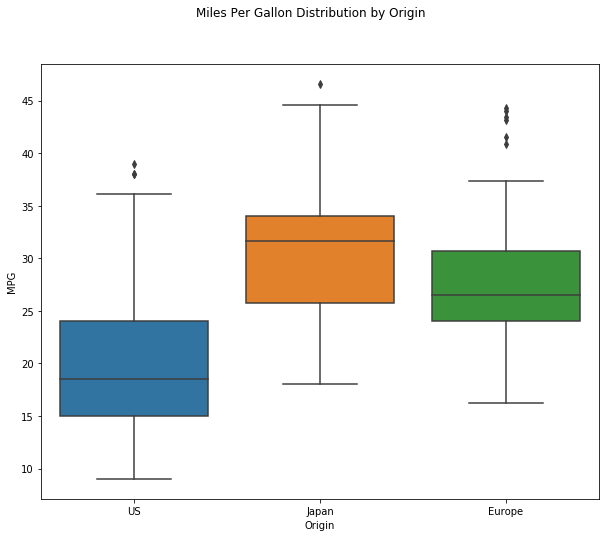

In [170]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=autos, x='origin_nm', y='mpg', ax=ax)
fig.suptitle('Miles Per Gallon Distribution by Origin')
ax.set_xlabel('Origin')
ax.set_ylabel('MPG')
fig.savefig('mpg_boxplot.png')
plt.show()


Let's fit a Random Forest.

In [171]:
predictors = autos.drop(['car name','origin','mpg'],axis=1).copy()
predictors.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_nm
0,8,307.0,130.0,3504,12.0,70,US
1,8,350.0,165.0,3693,11.5,70,US
2,8,318.0,150.0,3436,11.0,70,US
3,8,304.0,150.0,3433,12.0,70,US
4,8,302.0,140.0,3449,10.5,70,US


In [172]:
target = autos[['mpg']].copy()
target.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [173]:
type(target)

pandas.core.frame.DataFrame

In [174]:
cats = predictors.select_dtypes(include='object')

In [175]:
cats.head()

,origin_nm
0,US
1,US
2,US
3,US
4,US


In [176]:
ohe = OneHotEncoder(sparse=False)

In [177]:
ohe.fit(cats)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [178]:
cats_ohe = ohe.transform(cats)

In [179]:
nms = ohe.get_feature_names([''])

In [180]:
origin_ohe = pd.DataFrame(cats_ohe, columns=nms)

In [181]:
origin_ohe.head()

,_Europe,_Japan,_US
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [182]:
predictors.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_nm
0,8,307.0,130.0,3504,12.0,70,US
1,8,350.0,165.0,3693,11.5,70,US
2,8,318.0,150.0,3436,11.0,70,US
3,8,304.0,150.0,3433,12.0,70,US
4,8,302.0,140.0,3449,10.5,70,US


In [183]:
predictors = predictors.drop(['origin_nm'], axis=1).copy()

In [184]:
predictors.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [185]:
predictors = pd.concat([predictors,origin_ohe], axis=1)

In [186]:
predictors.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,_Europe,_Japan,_US
0,8,307.0,130.0,3504,12.0,70,0.0,0.0,1.0
1,8,350.0,165.0,3693,11.5,70,0.0,0.0,1.0
2,8,318.0,150.0,3436,11.0,70,0.0,0.0,1.0
3,8,304.0,150.0,3433,12.0,70,0.0,0.0,1.0
4,8,302.0,140.0,3449,10.5,70,0.0,0.0,1.0


In [187]:
rf = RandomForestRegressor()

In [188]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=10)

In [189]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [190]:
rf.score(X_train, y_train)

0.9750860337020748

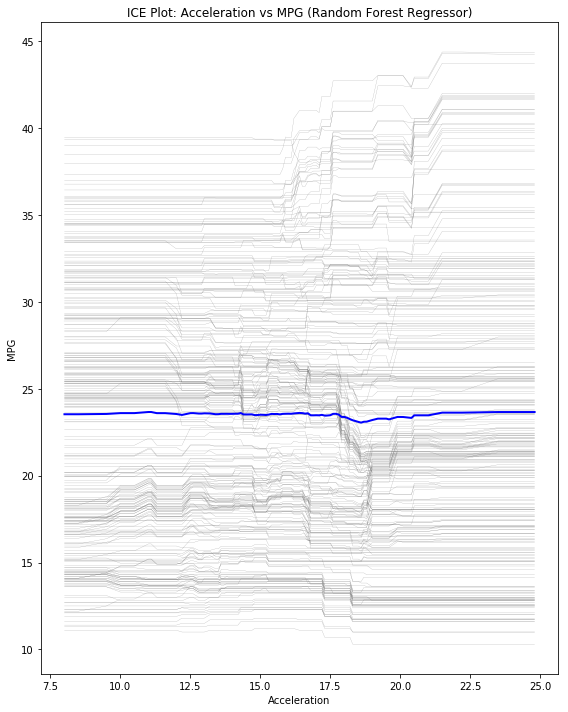

In [191]:
# Create dataframe input for ICE plot
auto_ice = ice(data=X_train, column='acceleration', predict=rf.predict)

fig, ax = plt.subplots(figsize=(8,10))

ice_plot(auto_ice, c='dimgray', linewidth=0.2, plot_pdp=True
         ,pdp_kwargs={'c': 'blue', 'linewidth': 2}, ax=ax, alpha=0.7 ) 

ax.set_title('ICE Plot: Acceleration vs MPG (Random Forest Regressor)')
ax.set_ylabel("MPG")
ax.set_xlabel("Acceleration")
fig.tight_layout()

# Save that figure
fig.savefig('ice_auto_accel.png')

How about if we look at by Origin?

In [192]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', '_Europe', '_Japan', '_US'],
      dtype='object')

#### Make flags for countries so can do pure binary comparisons

In [193]:
predictors.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', '_Europe', '_Japan', '_US'],
      dtype='object')

In [194]:
is_japan = predictors.index[predictors['_Japan']==1].tolist()

In [195]:
is_us = predictors.index[predictors['_US']==1].tolist()

In [196]:
is_eur = predictors.index[predictors['_Europe']==1].tolist()

In [197]:
len(is_japan) + len(is_us) + len(is_eur)

398

In [198]:
predictors.loc[set(predictors.index)-set(is_japan)].head()

,cylinders,displacement,horsepower,weight,acceleration,model year,_Europe,_Japan,_US
0,8,307.0,130.0,3504,12.0,70,0.0,0.0,1.0
1,8,350.0,165.0,3693,11.5,70,0.0,0.0,1.0
2,8,318.0,150.0,3436,11.0,70,0.0,0.0,1.0
3,8,304.0,150.0,3433,12.0,70,0.0,0.0,1.0
4,8,302.0,140.0,3449,10.5,70,0.0,0.0,1.0


US vs Europe

In [199]:
X_train, X_test, y_train, y_test = train_test_split(predictors.loc[set(predictors.index)-set(is_japan)]
                                                    , target.loc[set(predictors.index)-set(is_japan)], random_state=10)

In [200]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
rf.score(X_train, y_train)

0.9788381143741116

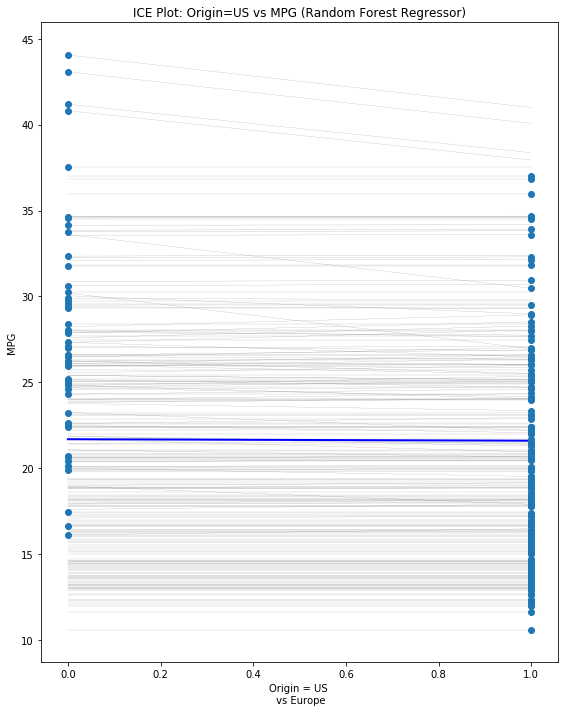

In [202]:
# Create dataframe input for ICE plot
auto_ice = ice(data=X_train, column='_US', predict=rf.predict)

fig, ax = plt.subplots(figsize=(8,10))

ice_plot(auto_ice, c='dimgray', linewidth=0.2, plot_pdp=True
         ,pdp_kwargs={'c': 'blue', 'linewidth': 2}, ax=ax, alpha=0.7, plot_points=True ) 

ax.set_title('ICE Plot: Origin=US vs MPG (Random Forest Regressor)')
ax.set_ylabel("MPG")
ax.set_xlabel("Origin = US \n vs Europe" )
fig.tight_layout()

# Save that figure
fig.savefig('ice_auto_US.png')

Japan vs Europe

In [203]:
X_train, X_test, y_train, y_test = train_test_split(predictors.loc[set(predictors.index)-set(is_us)]
                                                    , target.loc[set(predictors.index)-set(is_us)], random_state=10)

In [204]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [205]:
rf.score(X_train, y_train)

0.9531055487380842

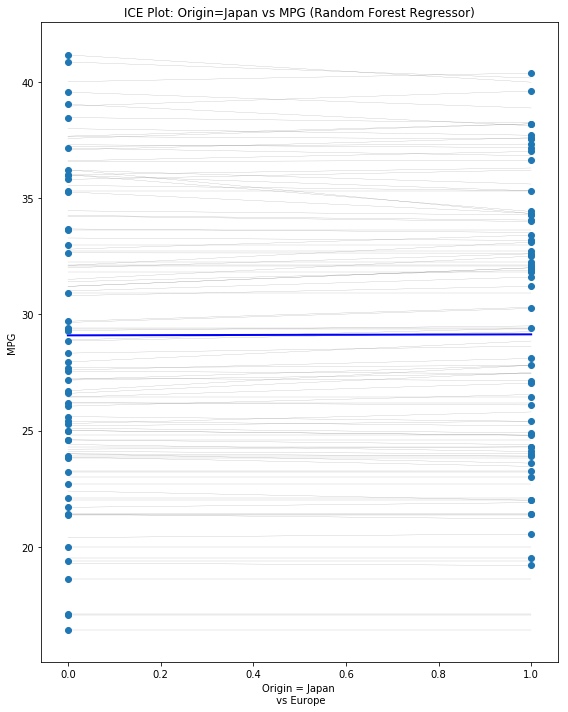

In [206]:
# Create dataframe input for ICE plot
auto_ice = ice(data=X_train, column='_Japan', predict=rf.predict)

fig, ax = plt.subplots(figsize=(8,10))

ice_plot(auto_ice, c='dimgray', linewidth=0.2, plot_pdp=True
         ,pdp_kwargs={'c': 'blue', 'linewidth': 2}, ax=ax, alpha=0.7, plot_points=True ) 

ax.set_title('ICE Plot: Origin=Japan vs MPG (Random Forest Regressor)')
ax.set_ylabel("MPG")
ax.set_xlabel("Origin = Japan \n vs Europe")
fig.tight_layout()

# Save that figure
fig.savefig('ice_auto_japan.png')